# Sparse singular vectors

The left singular vectors associated with the smallest and largest singular values of a 
matrix $A$ (globally) minimize and maximize $\|Ax\|_2$ subject to $\|x\|_2 = 1$.  

Here we seek sparse vectors, with $\|x\|_2 = 1$, which make $\|Ax\|_2$ large or small.  
To induce sparsity in $x$, we limit the $\ell_1$-norm of $x$.  

*(We could also limit a nonconvex sparsifier, as above in sparse recovery.)*  

This leads to the problems

$$
\begin{array}{ll}
\text{minimize/maximize} & \|Ax\|_2 \\
\text{subject to} & \|x\|_2 = 1, \quad \|x\|_1 \leq \mu,
\end{array}
$$

where $x \in \mathbb{R}^n$ is the variable and $\mu \geq 0$ controls the sparsification, 
to find $x$ that is sparse, satisfies $\|x\|_2 = 1$, and makes $\|Ax\|_2$ small or 
large.  

We call such a vector, with some abuse of notation, a *sparse singular vector*. 

Since $\|x\|_2 = 1$, we know $1 \leq \|x\|_1 \leq \sqrt{n}$, so the range of 
$\mu$ can be set as $[1, \sqrt{n}]$.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
from dccp import is_dccp

rng = np.random.default_rng(seed=0)
m = 10
n = 10
A0 = np.random.randn(m, n)
U, Sigma, V = np.linalg.svd(A0, full_matrices=False)
Sigma = Sigma / Sigma[-1]
A = np.dot(U, np.dot(np.diag(Sigma), V))

# smallest singular value
mu = cp.Parameter(nonneg=True)
x = cp.Variable(n)
cost = cp.norm(A @ x)
constr = [cp.norm(x, 2) == 1, cp.norm(x, 1) <= mu]
obj = cp.Minimize(cost)
prob = cp.Problem(obj, constr)
singular_value = []
card = []
x_result = []
mu_vals = np.linspace(1, np.sqrt(n), 50)

for val in mu_vals:
    mu.value = val
    prob.solve(method="dccp", max_iter=50)
    assert is_dccp(prob)
    singular_value.append(cp.norm(A @ x).value)
    card.append(np.sum(np.abs(x.value) >= 1e-2))
    x_result.append(x.value)

## Numerical example

We consider an instance for minimization with a random matrix 
$A \in \mathbb{R}^{100 \times 100}$ with i.i.d.\ entries $A_{ij} \sim \mathcal{N}(0,1)$, 
with (positive) smallest singular value $\sigma_{\min}$.  

The parameter $\mu$ is swept from 1 to 10 with increment 0.2, and for each value of $\mu$ the result of solving the problem above is shown as a red dot.  

The most left point in the figure corresponds to $\|x\|_1 \leq 1$, which gives 
cardinality 1.  

In this instance it achieves the globally optimal value, which is the smallest of 
the norm of the columns of $A$.

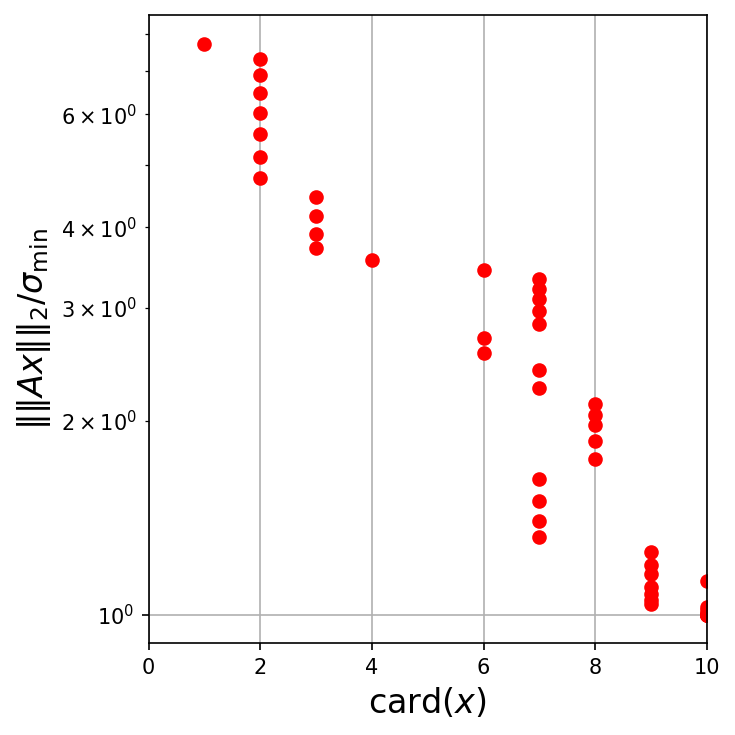

In [5]:
plt.figure(figsize=(5, 5), dpi=150)
for ind in range(len(card)):
    plt.plot(card[ind], singular_value[ind], "r o")
plt.xlim([0, n])
plt.yscale("log")
plt.grid()
plt.ylabel(r"$\|\|Ax\|\|_2/\sigma_{\mathrm{min}}$", fontsize=16)
plt.xlabel("card($x$)", fontsize=16)
plt.tight_layout()